In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml 

In [3]:
X,y=fetch_openml('diamonds',return_X_y=True)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name diamonds exist. Versions may be fundamentally different, returning version 1.
  warn(


In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
type(y)

pandas.core.series.Series

In [6]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [7]:
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

In [8]:
df=X
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [9]:
df['output']=y
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,output
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335.0


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
output     0
dtype: int64

In [11]:
dfupdate=df.sample(frac=0.50).index
df.loc[dfupdate,'carat']=np.nan
df.isnull().sum()

carat      26970
cut            0
color          0
clarity        0
depth          0
table          0
x              0
y              0
z              0
output         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    26970 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
 9   output   53940 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.0 MB


In [13]:
df.isnull().tail()

,carat,cut,color,clarity,depth,table,x,y,z,output
53935,True,False,False,False,False,False,False,False,False,False
53936,True,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,True,False,False,False,False,False,False,False,False,False
53939,False,False,False,False,False,False,False,False,False,False


In [14]:
df[df.carat.isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,output
0,NaN,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0
1,NaN,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326.0
2,NaN,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0
3,NaN,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334.0
4,NaN,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335.0
...,...,...,...,...,...,...,...,...,...,...
53931,NaN,Premium,F,SI1,59.8,62.0,5.74,5.73,3.43,2756.0
53932,NaN,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47,2757.0
53935,NaN,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757.0
53936,NaN,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757.0


In [15]:
df.shape

(53940, 10)

In [16]:
df.dropna(how='any').shape

(26970, 10)

In [17]:
df['carat'].value_counts()

0.30    1321
1.01    1120
0.31    1113
0.70     999
0.32     972
        ... 
1.92       1
2.75       1
3.04       1
1.85       1
2.63       1
Name: carat, Length: 261, dtype: int64

In [18]:
mean_value=df['carat'].mean()

In [19]:
df['carat'].fillna(value=mean_value,inplace=True)
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,output
53935,0.798241,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757.0
53936,0.798241,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757.0
53937,0.700000,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757.0
53938,0.798241,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757.0
53939,0.750000,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757.0


**Data Preprocessing**
Steps:
1.Data Cleaning
2.Identifying and removing outliers
3.Encoding categorical values

In [20]:
df.info

<bound method DataFrame.info of           carat        cut color clarity  depth  table     x     y     z  \
0      0.798241      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43   
1      0.798241    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31   
2      0.798241       Good     E     VS1   56.9   65.0  4.05  4.07  2.31   
3      0.798241    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63   
4      0.798241       Good     J     SI2   63.3   58.0  4.34  4.35  2.75   
...         ...        ...   ...     ...    ...    ...   ...   ...   ...   
53935  0.798241      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50   
53936  0.798241       Good     D     SI1   63.1   55.0  5.69  5.75  3.61   
53937  0.700000  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56   
53938  0.798241    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74   
53939  0.750000      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64   

       output  
0       326.0  
1       326.0  
2      

In [21]:
df.describe()

,carat,depth,table,x,y,z,output
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798241,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.337871,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.700000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.798241,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,0.798241,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,4.500000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


Since, minimum values of 'x','y' and 'z' are zero. There is a presence of faulty values(outliers).

In [22]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)
df.shape

(53920, 10)

In [23]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

Dropping the outliers that we found from the plots above.

In [24]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df= df[(df["table"]<80)&(df["table"]>40)]
df= df[(df["x"]<30)]
df= df[(df["y"]<30)]
df= df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

Plot of cleaner dataset

In [26]:

object_cols = ['cut','color','clarity']
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [27]:
label_data = df.copy()

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [29]:
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,output
0,0.798241,2,1,3,61.5,55.0,3.95,3.98,2.43,326.0
1,0.798241,3,1,2,59.8,61.0,3.89,3.84,2.31,326.0
2,0.798241,1,1,4,56.9,65.0,4.05,4.07,2.31,327.0
3,0.798241,3,5,5,62.4,58.0,4.20,4.23,2.63,334.0
4,0.798241,1,6,3,63.3,58.0,4.34,4.35,2.75,335.0


In [30]:
df.describe()

,carat,depth,table,x,y,z,output
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.798089,61.749741,57.455948,5.731463,5.733292,3.539441,3930.584470
std,0.337673,1.420119,2.226153,1.119384,1.111252,0.691434,3987.202815
min,0.200000,50.800000,43.000000,3.730000,3.680000,2.060000,326.000000
25%,0.700000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,0.798241,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,0.798241,62.500000,59.000000,6.540000,6.540000,4.040000,5322.000000
max,4.500000,73.600000,79.000000,10.740000,10.540000,6.980000,18823.000000


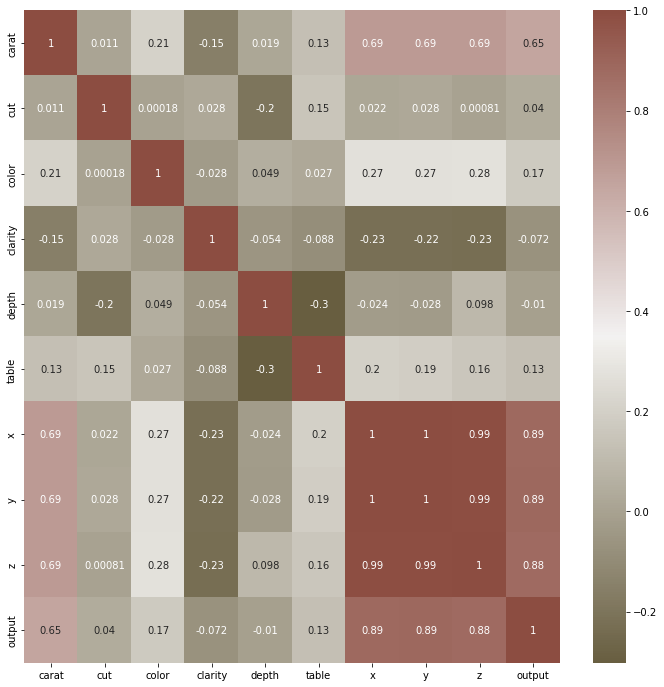

In [31]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X= label_data.drop(["output"],axis =1)
y= label_data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [35]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [36]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

In [37]:
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

In [38]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

[16:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1702.896124 
DecisionTree: -759.543917 
RandomForest: -557.654580 
KNeighbors: -887.088476 
[16:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
pred = pipeline_xgb.predict(X_test)

In [41]:

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 681.9216019130682
